[[10, 6.354400011332473e-06], [11, 9.650900028645993e-06], [12, 9.134900028584526e-06], [13, 1.0596300035103922e-05], [14, 1.1739899946405785e-05], [15, 1.3724600012210431e-05], [16, 1.365450007142499e-05], [17, 1.3420100003713742e-05], [18, 1.6997100010485157e-05], [19, 1.8039899987343234e-05], [20, 2.0263500027795088e-05]]


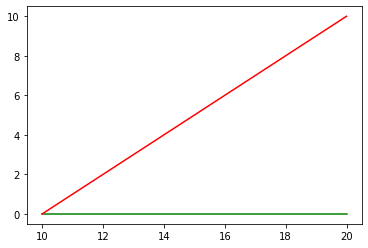

In [25]:
import matplotlib.pyplot as plt
from timeit import timeit
import numpy as np

def min_heapify(h: np.ndarray, i: int):
    left_child = 2*i+1
    right_child = 2*i+2 
    while  left_child < len(h):
        aux = i
        if h[aux] > h[left_child]:
            aux = left_child
        if (right_child) < len(h) and h[aux] > h[right_child]:
            aux = right_child
        if aux > i:
            h[i], h[aux] = h[aux], h[i]
            i = aux
        else:
            return 
            

def create_min_heap(h: np.ndarray):
    aux = np.empty(len(h))

    for i in range(len(h)):
        aux[i] = h[i]
        min_heapify(aux, i)

    h = aux


def plot1():
    l_timings = []
    arr=[]
    arr1=[]
    arr_n=[]
    for i in range(11):
        dim = 10+i
        h = list(np.random.permutation(dim))
        timings = %timeit -o -n 10 -r 5 -q create_min_heap(h)
        l_timings.append([dim, timings.best])
        arr.append(dim)
        arr1.append(timings.average)
        arr_n.append(i)



    print(l_timings)


    
    
    plt.plot(arr, arr1, 'g-')
    #plt.plot(arr, arr_n, 'r-')

if __name__ == "__main__":
    plot1()

In [3]:
from timeit import timeit
import numpy as np

def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray)-> np.ndarray:
    """Check the dimensions to see if they can be multiplied"""
    if(m_1.shape[1]!=m_2.shape[0]):
        return None

    """m_1.rows, m_2.columns"""
    res = np.ndarray((m_1.shape[0], m_2.shape[1])) 

    """Do the multiplication"""
    for i in range(m_1.shape[0]):
        for j in range(m_2.shape[1]):
            sum=0
            for k in range(m_1.shape[1]):
                sum += m_1[i][k]*m_2[k][j] 
            res[i][j] = sum

    return res

if __name__=="__main__":
    l_timings = []
    
    for i in range(11):
        dim = 10+i
        m = np.random.uniform(0., 1., (dim, dim))
        timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
        l_timings.append([dim, timings.best])

    print(l_timings)

[[10, 0.00042846389997066583], [11, 0.0005760629000178596], [12, 0.0007464383999831626], [13, 0.0009341840000161028], [14, 0.0011619732999861299], [15, 0.0014405879999685566], [16, 0.001715733199944225], [17, 0.002054184000007808], [18, 0.002413698700001987], [19, 0.0028558820000398554], [20, 0.0033167190999847662]]


In [2]:
from timeit import timeit
import numpy as np


if __name__=="__main__":
    l_timings = []
    
    for i in range(11):
        dim = 10+i
        m = np.random.uniform(0., 1., (dim, dim))
        timings = %timeit -o -n 10 -r 5 -q m.dot(m)
        l_timings.append([dim, timings.best])

    print(l_timings)

[[10, 7.997000466275495e-07], [11, 9.067000064533203e-07], [12, 9.02600004337728e-07], [13, 9.94099991658004e-07], [14, 1.0535000001254957e-06], [15, 1.2026000149489846e-06], [16, 1.0523999662837014e-06], [17, 1.190900002256967e-06], [18, 1.3136999768903478e-06], [19, 1.4708000890095719e-06], [20, 1.3632000445795712e-06]]


Recursive bin search  [[5, 5.302500085235807e-07], [12, 1.0638099956850055e-06], [28, 1.2824500026908935e-06], [64, 1.5007000001787675e-06], [144, 1.7838100029621274e-06], [320, 2.126849994965596e-06], [704, 2.6293099926988363e-06], [1536, 2.865269998437725e-06], [3328, 3.1370699980470817e-06], [7168, 3.389530002095853e-06]]

Iterative bin search  [[5, 5.23389999216306e-07], [12, 8.659000013722107e-07], [28, 1.0389700037194417e-06], [64, 1.2318799963395576e-06], [144, 1.4547899991157465e-06], [320, 1.7690700042294339e-06], [704, 2.1991300036461323e-06], [1536, 2.3938199956319294e-06], [3328, 2.6044799960800447e-06], [7168, 3.0659500043839218e-06]]


/tmp/ipykernel_13328/3619679780.py:49: RuntimeWarning: divide by zero encountered in log2
  arr_log.append(np.log2(i))


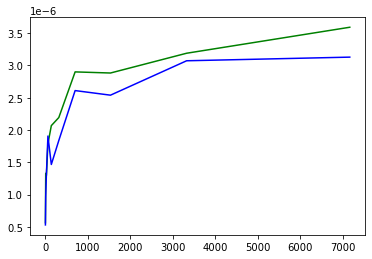

In [18]:
from timeit import timeit
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt

def rec_bb(t: List, f: int, l: int, key: int)-> int:
    if f>l:
        return None
    index = int(round((f+l)/2))
    aux=t[index]
    if aux==key:
        return index
    elif aux<key:
        return rec_bb(t, index+1, l, key)
    else:
        return rec_bb(t, f, index-1, key)
        
def bb(t: List, f: int, l: int, key: int)-> int:
    index = int(round((f+l)/2))
    while t[index]!=key:
        if t[index]<key:
            f=index+1
        elif t[index]>key:
            l=index-1
        if f>l:
            return None
        index = int(round((f+l)/2))
    return index
    
if __name__=="__main__":
    l_times = []
    l_times2 = []
    arr=[]
    arr1=[]
    arr2=[]
    arr_log=[]
    for i, size in enumerate(range(5, 15)): #(1,5;2,6;3,7;...;10,15)
        t = list(range(2**i * size))
        key = len(t) - 1 
        timings = %timeit -n 100 -r 10 -o -q rec_bb(t, 0, len(t) - 1, key)
        l_times.append([len(t), timings.best])
        times = np.array(l_times)
        timings2 = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
        l_times2.append([len(t), timings2.best])
        times2 = np.array(l_times2)
        arr.append(len(t))
        arr1.append(timings.average)
        arr2.append(timings2.average)
        arr_log.append(np.log2(i))
    print("Recursive bin search ",l_times)
    print("\nIterative bin search ", l_times2)
    
    plt.plot(arr, arr1, 'g-')
    plt.plot(arr, arr2, 'b-')
    #plt.plot(arr, arr_log, 'r-')

